In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from scipy.stats import chi2_contingency, f_oneway, kruskal
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [25]:
df = pd.read_csv('sdoh_data.csv')
#columns :wrkstat	age	educ	degree	sex	race	income	health	socrel	socommun	satjob	satfin	health1	depress	satfam7	chldsafe	ballot	physact	disblty


In [26]:
df.columns

Index(['year', 'id_', 'wrkstat', 'age', 'educ', 'degree', 'sex', 'race',
       'income', 'health', 'socrel', 'socommun', 'satjob', 'satfin', 'health1',
       'depress', 'satfam7', 'chldsafe', 'ballot', 'physact', 'disblty'],
      dtype='object')

In [27]:
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   year  id_                                 wrkstat age                educ  \
0  2014    1                       Working full time  53  4 years of college   
1  2014    2                       Working full time  26  4 years of college   
2  2014    3  Unemployed, laid off, looking for work  59   1 year of college   
3  2014    4                       Working part time  56  4 years of college   
4  2014    5                                 Retired  74  5 years of college   

        degree     sex   race           income             health  ...  \
0   Bachelor's    MALE  White  $25,000 or more          Excellent  ...   
1   Bachelor's  FEMALE  White  $25,000 or more          Excellent  ...   
2  High school    MALE  White  $25,000 or more               Good  ...   
3   Bachelor's  FEMALE  White  $25,000 or more  .i:  Inapplicable  ...   
4   Bachelor's  FEMALE  White     .r:  Refused          Excellent  ...   

           socommun                satjob    

In [28]:
print("\nData summary:")
print(df.info())



Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18638 entries, 0 to 18637
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      18638 non-null  int64 
 1   id_       18638 non-null  int64 
 2   wrkstat   18638 non-null  object
 3   age       18638 non-null  object
 4   educ      18638 non-null  object
 5   degree    18638 non-null  object
 6   sex       18638 non-null  object
 7   race      18638 non-null  object
 8   income    18638 non-null  object
 9   health    18638 non-null  object
 10  socrel    18638 non-null  object
 11  socommun  18638 non-null  object
 12  satjob    18638 non-null  object
 13  satfin    18638 non-null  object
 14  health1   18638 non-null  object
 15  depress   18638 non-null  object
 16  satfam7   18638 non-null  object
 17  chldsafe  18638 non-null  object
 18  ballot    18638 non-null  object
 19  physact   18638 non-null  object
 20  disblty   18638 non-null  object
dt

In [29]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
year        0
id_         0
wrkstat     0
age         0
educ        0
degree      0
sex         0
race        0
income      0
health      0
socrel      0
socommun    0
satjob      0
satfin      0
health1     0
depress     0
satfam7     0
chldsafe    0
ballot      0
physact     0
disblty     0
dtype: int64


In [30]:
# Define special codes to treat as missing
special_codes = [
    ".n:  No answer",".i:  Inapplicable",".s:  Skipped on Web"
    ,".d:  Do not Know/Cannot Choose",".y:  Not available in this year"
    ,".z:  Variable-specific reserve code",".r:  Refused"
]

# Replace special codes with np.nan for all columns except 'id' and 'year'
for col in df.columns:
    if col not in ['id', 'year']:
        df[col] = df[col].replace(special_codes, np.nan)



C:\Users\svishnumolakala\AppData\Local\Temp\ipykernel_34760\2190776953.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(special_codes, np.nan)


In [31]:
# Replace "89 or older" with 89
df['age'] = df['age'].replace("89 or older", 89)

# Convert the column to numeric (coerce errors to NaN)
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [32]:
# Calculate missing percentage for each column
missing_percentage = df.isnull().mean() * 100
print("Missing percentage per column:")
print(missing_percentage)

# Remove columns with missing percentage greater than 30% as we have lot of data 
columns_to_drop = missing_percentage[missing_percentage > 30].index
df.drop(columns=columns_to_drop, inplace=True)


Missing percentage per column:
year          0.000000
id_           0.000000
wrkstat       0.177058
age           3.584076
educ          0.654577
degree        0.182423
sex           0.702865
race          0.922846
income       10.870265
health       14.035841
socrel       33.699968
socommun     33.662410
satjob       31.033373
satfin        0.423865
health1      75.185106
depress      75.211933
satfam7      93.738599
chldsafe    100.000000
ballot        0.000000
physact      93.963945
disblty      93.835175
dtype: float64


In [33]:
# Drop rows where 'health' is null
df = df.dropna(subset=['health'])

In [34]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
year          0
id_           0
wrkstat      27
age         648
educ        106
degree       28
sex         122
race        166
income     1762
health        0
satfin       63
ballot        0
dtype: int64


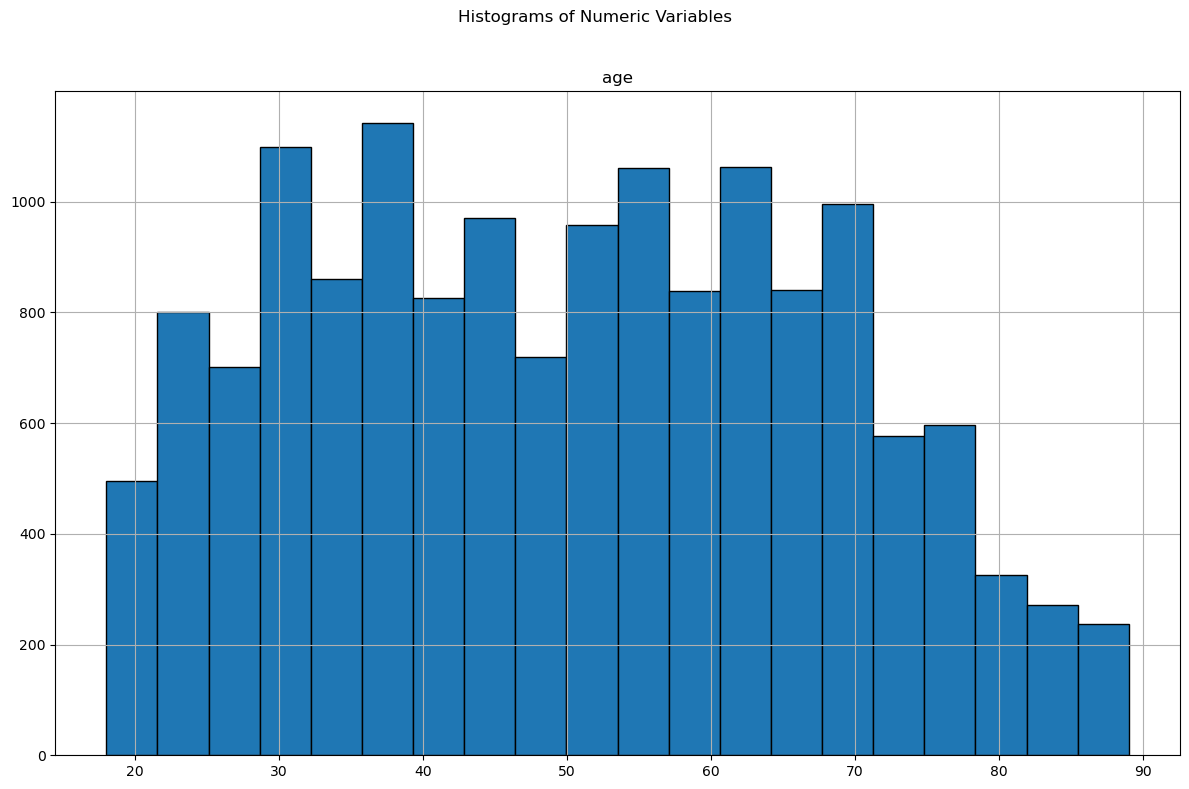

C:\Users\svishnumolakala\AppData\Local\Temp\ipykernel_34760\2553774817.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


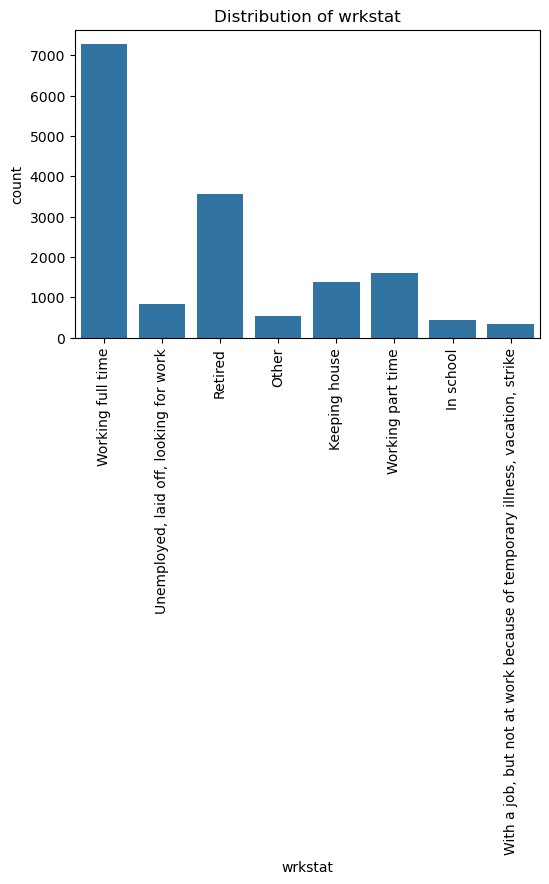

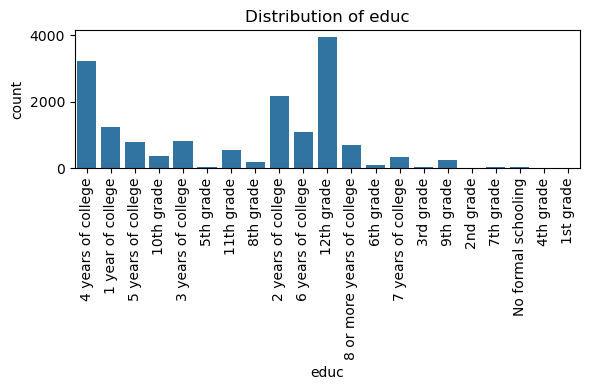

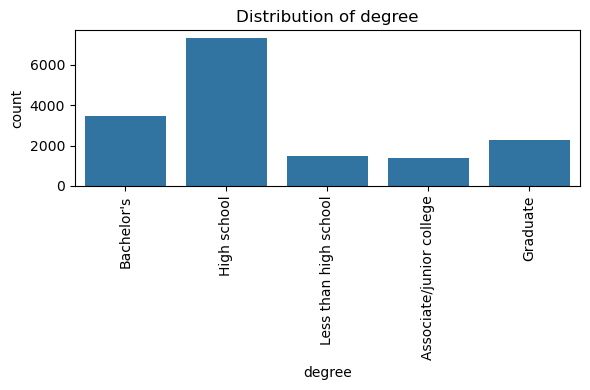

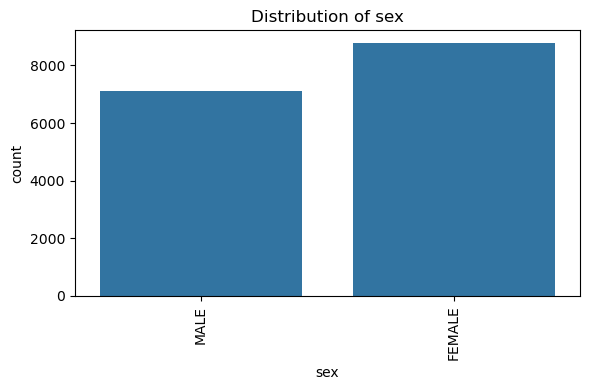

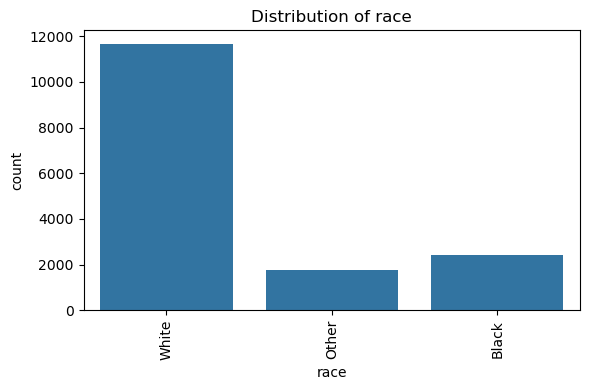

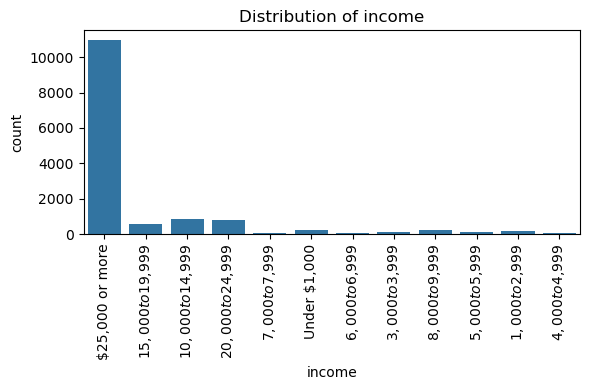

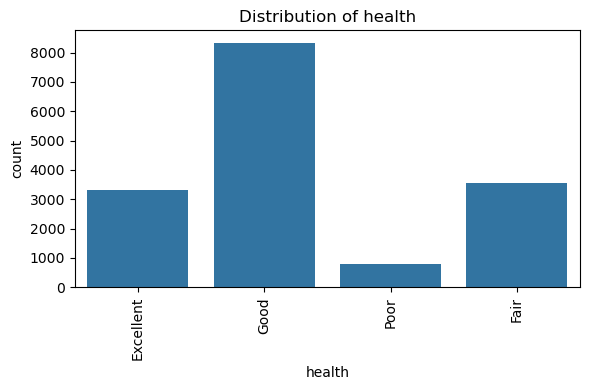

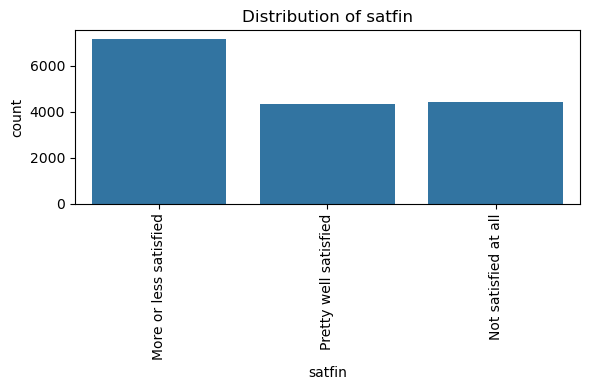


Summary statistics for numeric variables:
                age
count  15374.000000
mean      50.120853
std       17.721645
min       18.000000
25%       35.000000
50%       50.000000
75%       64.000000
max       89.000000


In [35]:
# --------------------------
# 3. Univariate Analysis
# --------------------------
numeric_cols = ['age']

# Histograms for numeric variables
df[numeric_cols].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle('Histograms of Numeric Variables')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('numeric_histograms.png')
plt.show()

categorical_cols = ['wrkstat', 'educ', 'degree', 'sex', 'race','income', 'health', 'satfin']
# Count plots for categorical variables with tilted x-axis
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f'distribution_{col}.png')
    plt.show()

# Summary statistics
print("\nSummary statistics for numeric variables:")
print(df[numeric_cols].describe())


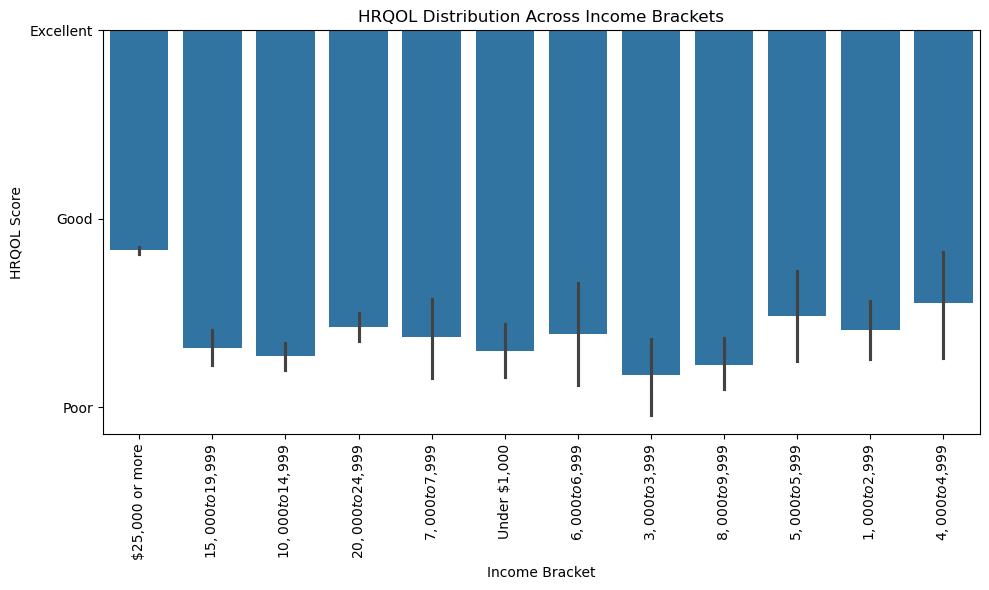

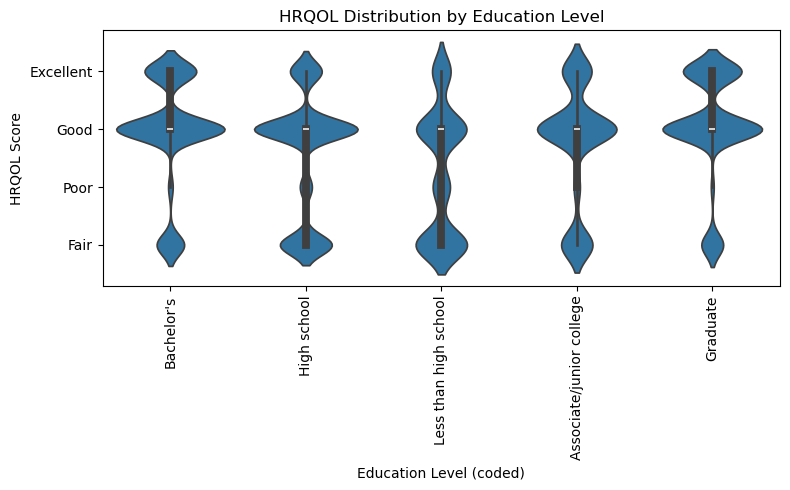

C:\Users\svishnumolakala\AppData\Local\Temp\ipykernel_34760\290411151.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='wrkstat', y='health', data=df, ci='sd')
C:\Users\svishnumolakala\AppData\Local\Temp\ipykernel_34760\290411151.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


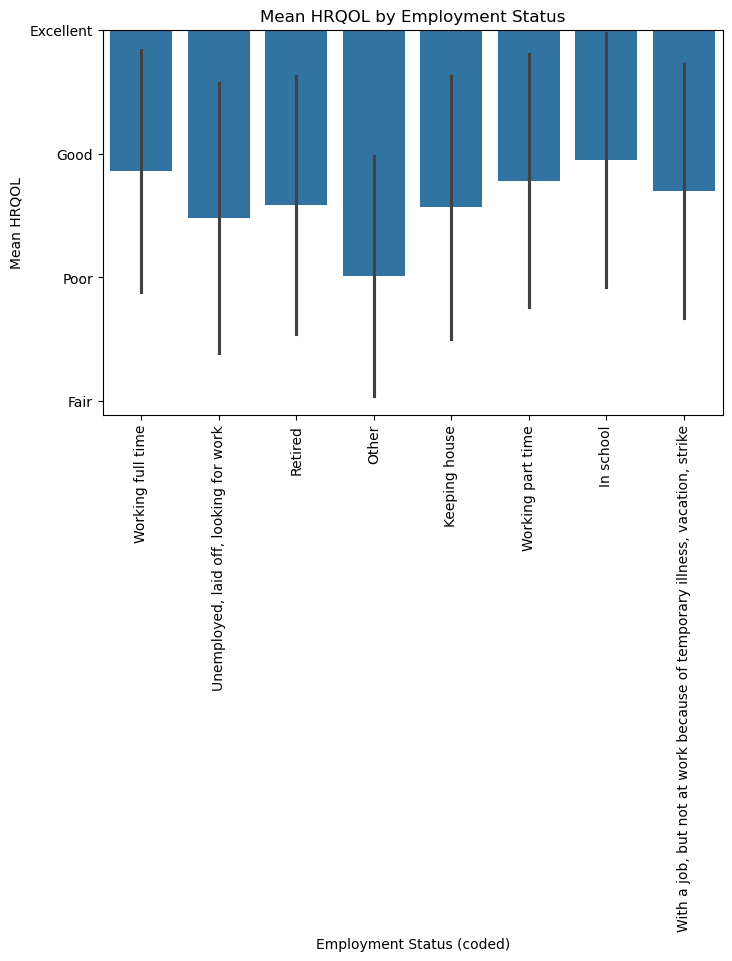

In [36]:
# --------------------------
# 4. Bivariate Analysis
# --------------------------



# Boxplots and violin plots for SDOH vs. HRQOL
plt.figure(figsize=(10, 6))
sns.barplot(x='income', y='health', data=df)
plt.title('HRQOL Distribution Across Income Brackets')
plt.xlabel('Income Bracket')
plt.ylabel('HRQOL Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('boxplot_income_hrqol.png')
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(x='degree', y='health', data=df)
plt.title('HRQOL Distribution by Education Level')
plt.xlabel('Education Level (coded)')
plt.xticks(rotation=90)
plt.ylabel('HRQOL Score')
plt.tight_layout()
plt.savefig('violin_educ_hrqol.png')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='wrkstat', y='health', data=df, ci='sd')
plt.title('Mean HRQOL by Employment Status')
plt.xlabel('Employment Status (coded)')
plt.xticks(rotation=90)
plt.ylabel('Mean HRQOL')
plt.tight_layout()
plt.savefig('bar_wrkstat_hrqol.png')
plt.show()




health              Excellent  Fair  Good  Poor
income                                         
$1,000 to $2,999           28    62    87    20
$10,000 to $14,999         84   289   346   108
$15,000 to $19,999         70   204   245    56
$20,000 to $24,999        115   249   365    79
$25,000 or more          2553  2036  6061   319
$3,000 to $3,999            8    40    41    10
$4,000 to $4,999           16    22    28     3
$5,000 to $5,999           20    30    37    10
$6,000 to $6,999           12    23    25     7
$7,000 to $7,999           12    26    35    16
$8,000 to $9,999           23    74    76    43
Under $1,000               36    93    95    23


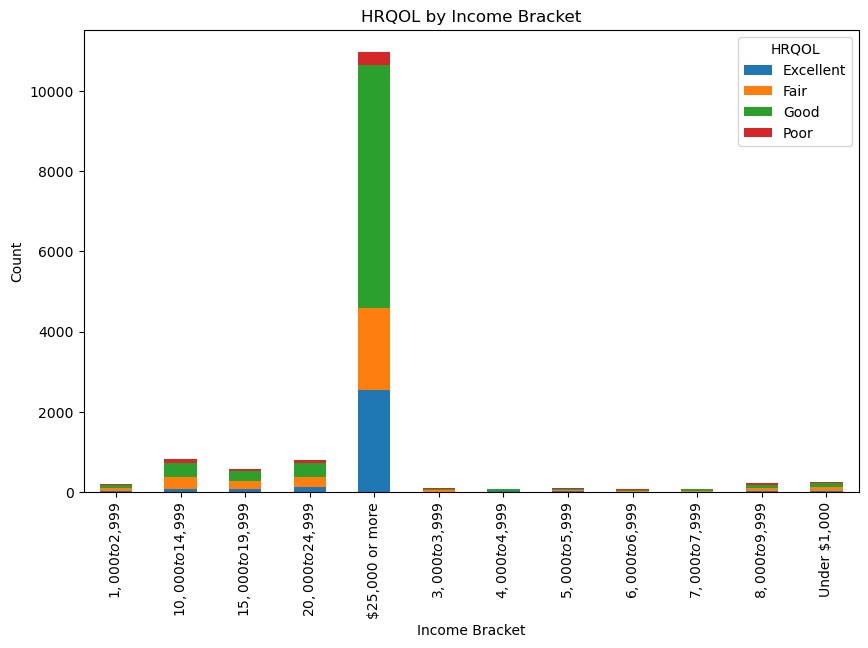

In [37]:
# Cross-tab between income and HRQOL
income_health_ct = pd.crosstab(df['income'], df['health'])
print(income_health_ct)


# Stacked bar plot for income vs HRQOL
income_health_ct.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('HRQOL by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Count')
plt.legend(title='HRQOL')
plt.show()



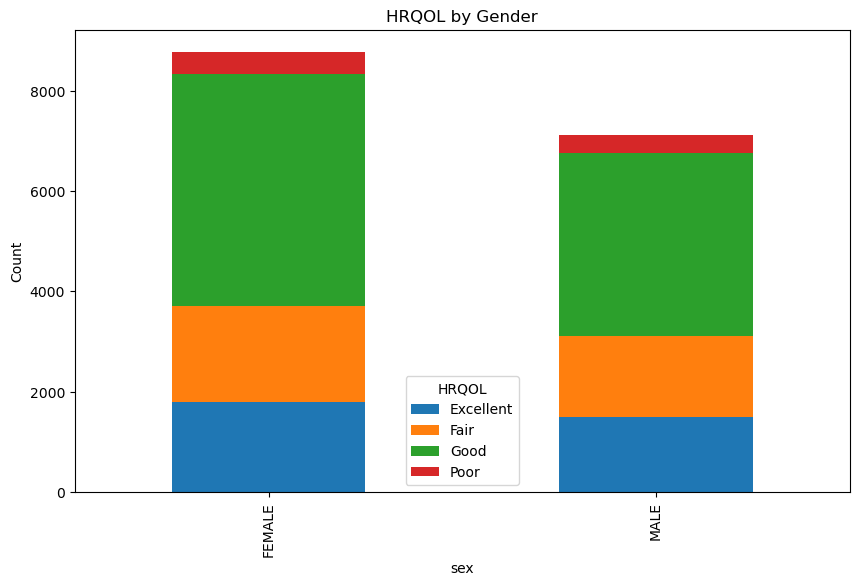

In [38]:


# Stacked bar plot for gender vs HRQOL
gender_health_ct = pd.crosstab(df['sex'], df['health'])
gender_health_ct.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('HRQOL by Gender')
plt.xlabel('sex')
plt.ylabel('Count')
plt.legend(title='HRQOL')
plt.show()


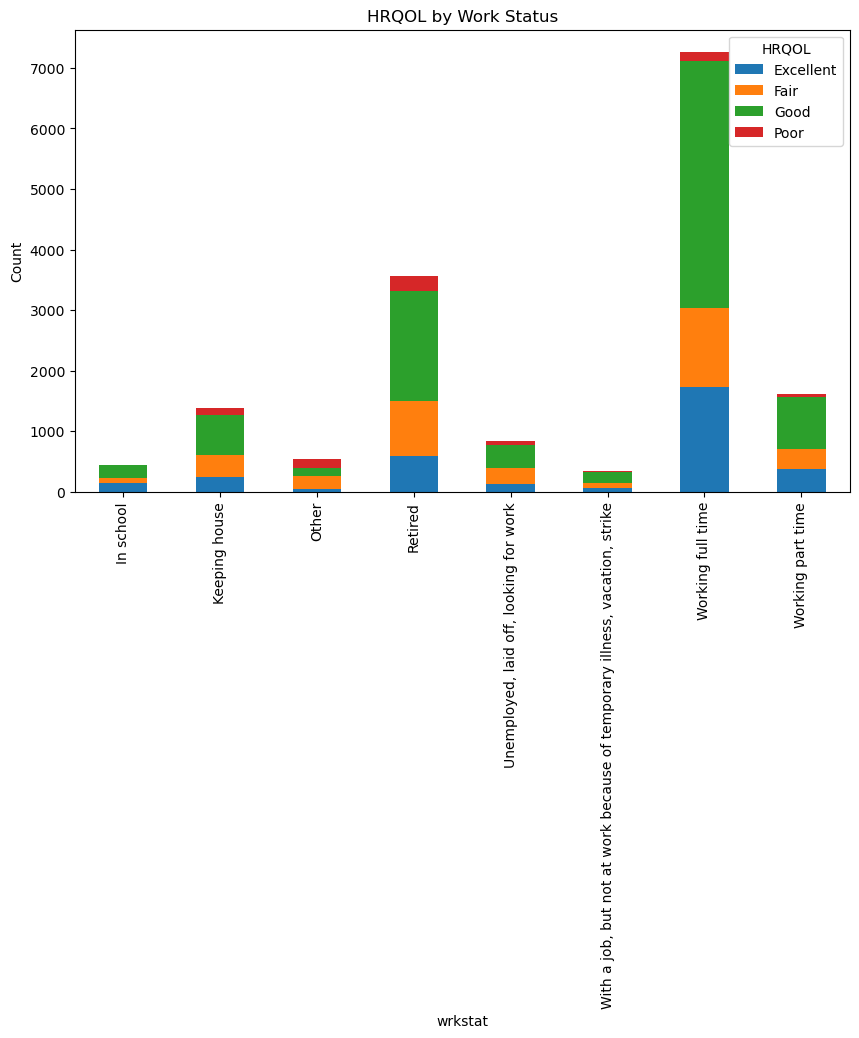

In [39]:
# Stacked bar plot for wrkstat vs HRQOL
wrkstat_health_ct = pd.crosstab(df['wrkstat'], df['health'])
wrkstat_health_ct.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('HRQOL by Work Status')
plt.xlabel('wrkstat')
plt.ylabel('Count')
plt.legend(title='HRQOL')
plt.show()

In [40]:
# --------------------------
# 2. Data Preparation
# --------------------------

# Encode categorical variables

for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes


# Fill any remaining missing values in numeric columns with median - age
df = df.fillna(df.median(numeric_only=True))



In [41]:
# --------------------------
# 6. Multivariate Analysis
# --------------------------

# OLS regression: HRQOL ~ Income + SDOH
X = df[['income', 'educ', 'wrkstat', 'degree', 'sex', 'race', 'satfin', 'age']]
X = sm.add_constant(X)
y = df['health']
model = sm.OLS(y, X).fit()
print("\nRegression summary for HRQOL ~ Income + SDOH:")
print(model.summary())





Regression summary for HRQOL ~ Income + SDOH:
                            OLS Regression Results                            
Dep. Variable:                 health   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     32.90
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           7.65e-52
Time:                        21:38:14   Log-Likelihood:                -20394.
No. Observations:               16022   AIC:                         4.081e+04
Df Residuals:                   16013   BIC:                         4.087e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

In [44]:
# --------------------------
# 8. Predictive Modeling
# --------------------------
#selected based on significance
features = [ 'educ', 'wrkstat', 'degree', 'satfin', 'age']

# Prepare binary target for group comparisons
hrqol_median = df['health'].median()
df['low_hrqol'] = (df['health'] < hrqol_median).astype(int)

X = df[features]
y = df['low_hrqol']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for ML
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression (traditional)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1]))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.98      0.73      1846
           1       0.44      0.02      0.04      1359

    accuracy                           0.57      3205
   macro avg       0.51      0.50      0.38      3205
weighted avg       0.52      0.57      0.43      3205

ROC-AUC: 0.5384059322824364


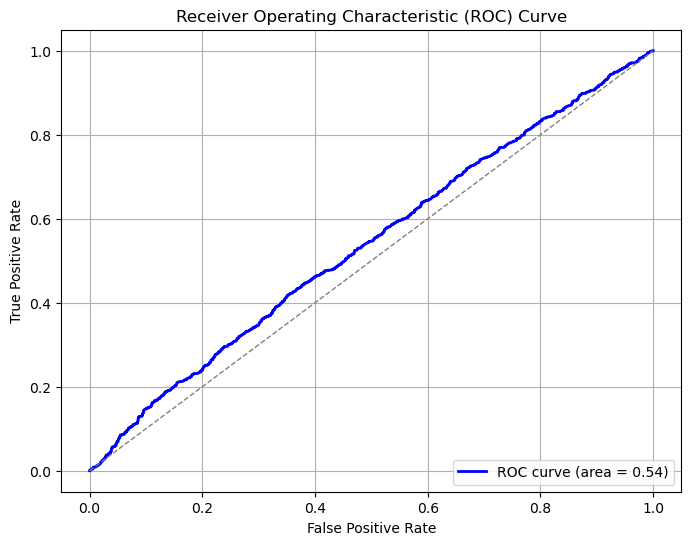

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()